In [28]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
# import statsmodels.graphics.gofplots as sm
import scipy
from scipy import stats

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Confidence Intervals Simulation

# Simulated data for Boiling Point

What is the point estimate for the mean of the boiling point, $\mu$?

The best estimate is the expected value for the random varible of the mean of the boiling point (the unbiased estimator of the population mean).  We estimate this as the mean of a sample, $\bar{x}$.

How good is this estimate of $\bar{x}$?

The SEM of $\bar{x}$ gives you the variability of the sampling distribution of the sample means:  an estimate of the precision of your sample mean to the true mean. 

We will simulate some data with a known or true mean of 102 and a known or true std of 1.2.  We can then see if our sample confidence interval contains the true mean or does not.  

The true mean = 102.00157392465428
The true std = 1.2008578735585647


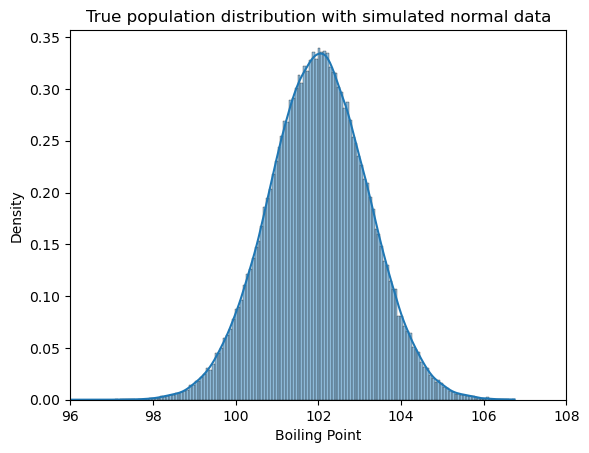

In [30]:
# simulated data for boiling point
fig, ax = plt.subplots()
normal_random_variables_BP=norm.rvs(102,1.2,size=100000)
ax=sns.histplot(normal_random_variables_BP,kde=True,stat='density',ax=ax)
ax.set_xlim(96,108)
ax.set_xlabel("Boiling Point")
ax.set_title("True population distribution with simulated normal data")

mean_BPall=np.mean(normal_random_variables_BP)
std_BPall=np.std(normal_random_variables_BP,ddof=1)
print("The true mean = " + str(mean_BPall))
print("The true std = " + str(std_BPall))

We will take a sample from this population of size = n = 10.  

The sample mean of 1 sample of size 10 = 101.89194335090698
The sample std of 1 sample of size 10 = 0.8543165347043994
The SEM of the sample mean of 1 sample of size 10 = 0.2701586092408186


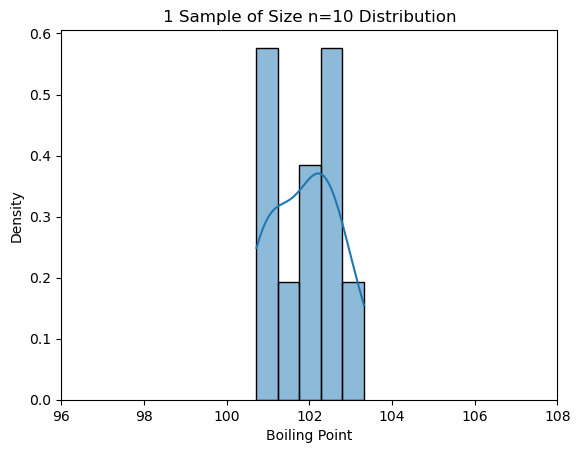

In [31]:
normal_random_variables_BP_10=norm.rvs(102,1.2,size=10)
fig, ax = plt.subplots()
sns.histplot(normal_random_variables_BP_10,kde=True,stat='density',ax=ax)
ax.set_xlim(96,108)
ax.set_xlabel("Boiling Point")
ax.set_title("1 Sample of Size n=10 Distribution")

mean_BP10=np.mean(normal_random_variables_BP_10)
std_BP10=np.std(normal_random_variables_BP_10,ddof=1)
print("The sample mean of 1 sample of size 10 = " + str(mean_BP10))
print("The sample std of 1 sample of size 10 = " + str(std_BP10))
print("The SEM of the sample mean of 1 sample of size 10 = " + str(std_BP10/np.sqrt(10)))

What we don't do but which is the basis of inferential statistics is to put this 1 sample that we have chosen into the context of a sampling distribution of the sample means of many sampling events. This represents the long-run proportion of sampling.  Let's simulate this by taking 100 samples from the population of n=10.    

In [32]:
mean_BP10B=[]
std_BP10B=[]
for i in range(1,100,1):
    normal_random_variables_BP_10A=norm.rvs(102,1.2,size=10)
    mean_BP10A=np.mean(normal_random_variables_BP_10A)
    std_BP10A=np.std(normal_random_variables_BP_10A)
    mean_BP10B.append(mean_BP10A)
    std_BP10B.append(std_BP10A)
    #print(mean_BP10A)

The mean of the sampling distribution of 100 sample means of size 10 = 102.00381401421403
The std of the sampling distribution of 100 sample means of size 10 = the SEM = 0.4055446546862002
The SEM of all samples means of size 10 = 0.37974460265915533


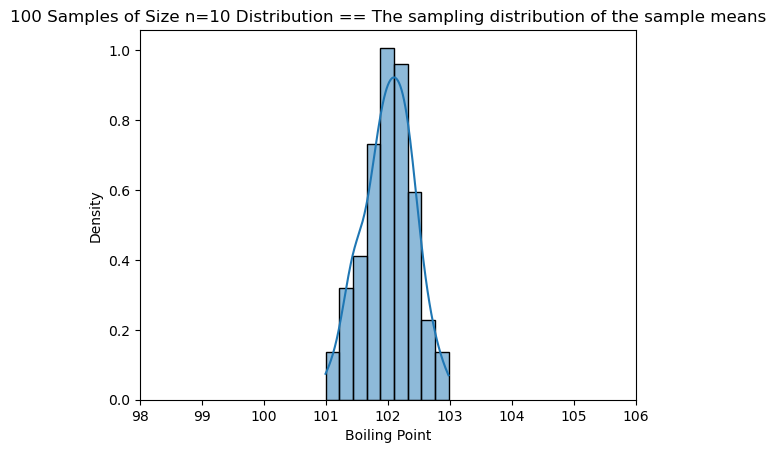

In [33]:
fig, ax = plt.subplots()
sns.histplot(mean_BP10B,kde=True, stat='density',ax=ax)
ax.set_xlim(98,106)
ax.set_xlabel("Boiling Point")
ax.set_title("100 Samples of Size n=10 Distribution == The sampling distribution of the sample means")

mean_BP10C=np.mean(mean_BP10B)
std_BP10C=np.std(mean_BP10B,ddof=1)
print("The mean of the sampling distribution of 100 sample means of size 10 = " + str(mean_BP10C))
print("The std of the sampling distribution of 100 sample means of size 10 = the SEM = " + str(std_BP10C))
print("The SEM of all samples means of size 10 = " + str((std_BPall/np.sqrt(10))))

According to the Central Limit Theorem (CLT), the distribution of sample means (the sampling distribution) should be nearly normal, even if the underlying population was not normal if the sample size is large enough. 

The mean of the sampling distribution should be approximately equal to the population mean ($\mu$ = 100) and the standard error (the standard deviation of sample means) should be approximately equal to the SD of the population divided by square root of sample size ($\sigma$/$\sqrt{10}$ = 1.2/$\sqrt{10}$ = 0.380). 

The SEM of $\bar{x}$ is estimated by using the sample standard deviation s, so s/$\sqrt{10}$.

# Using the SEM to calculate the Confidence Interval of the sample mean $\bar{x}$

Now that we have the SEM = s/$\sqrt{10}$, which is an estimate of precision or how close we are with the sample mean to the true mean, we can find the range of values that could include the true mean at a certain confidence level.  We can think of this as the accuracy of the sample mean estimate, or how often, over a long run of events, we cover the true mean.

The confidence interval for the true mean for unknown standard deviation: \
$\bar{x} - \frac{c_t*s}{\sqrt(n)} <= \mu <=  \bar{x} - \frac{c_t*s}{\sqrt(n)}$.

The ${c_t}$ here can be found from a t-table or from python (with dof=n-1=9) = 2.262.

In [34]:
from scipy.stats import t
import statsmodels as sm
ctBP = t.ppf(0.975,df=9)
print("The critical value for t =" + str(ctBP))

The critical value for t =2.2621571627409915


For the 1 sample taken above we can find the 95% confidence interval around the sample mean (2-sided). 

In [35]:
LB_BP = mean_BP10-ctBP*std_BP10/np.sqrt(10)
UB_BP = mean_BP10+ctBP*std_BP10/np.sqrt(10)
print(str(LB_BP) + " <= true mean= <= " +str(UB_BP))
print("check with python = " + str(sm.stats.weightstats._tconfint_generic(mean_BP10,std_BP10/np.sqrt(10),9,0.05,alternative='two-sided')))

101.28080211793672 <= true mean= <= 102.50308458387725
check with python = (101.28080211793672, 102.50308458387725)


We are 95% confident that the interval calculated contains the true mean of 102.

We can put this into the context of future, as yet undone, samples.  This puts the confidence on the estimation procedure of the sampling calculation, not on the specific interval found.  

This means that there is a 95% probability that the 95% confidence intervals calculated from future samples will cover the true mean. Or in frequentist terms that for future samples, 95% of the confidence intervals calculated will cover the true mean.  

The specific confidence interval found either has or does not have the true mean within it. The probability of the interval covering the true mean is either 1 or 0 once the interval is calulated.  The probability relates to the estimation procedure of the sampling calculation. 

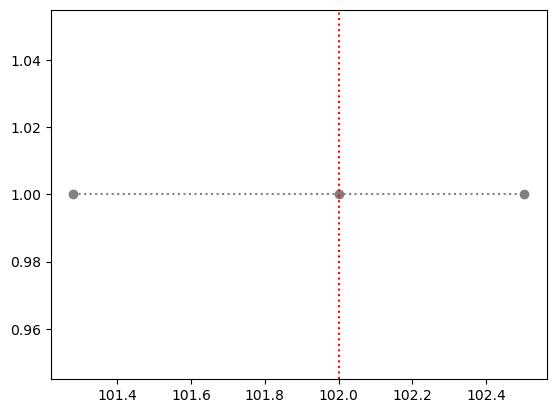

In [36]:
xvalues_10=[LB_BP,102,UB_BP]
yvalues_10=[1,1,1]
plt.plot(xvalues_10, yvalues_10,":",color="grey",marker="o");
plt.axvline(x=102,color="red", linestyle=":")

Does the confidence interval found from our single sample CI contain the true mean?

What if we took another 95% CI from another sample?

We will take the CIs for each of the 100 samples that we found above and plot each one:

In [37]:
ciU=[]
ciL=[]
ciU = (mean_BP10B)+((ctBP)*((std_BP10B)/np.sqrt(10)))
ciL = (mean_BP10B)-((ctBP)*((std_BP10B)/np.sqrt(10)))
ci_all=pd.DataFrame([ciL,ciU])
ci_all=ci_all.transpose()
ci_all

,0,1
0,101.163369,102.845013
1,100.563321,102.510324
2,101.455792,102.798921
3,100.534695,102.382906
4,101.852730,103.389909
...,...,...
94,101.432734,103.389743
95,102.250435,103.104232
96,101.143091,102.901527
97,102.055724,103.234213


What CI do not cover the true mean?  Let's filter out the CIs that do not. 

How many do you expect to not contain the true mean?

In [38]:
ci_all_Q=ci_all[ ( (ci_all[0]<102) & (ci_all[1]<102) ) | ( (ci_all[0]>102) & (ci_all[1]>102) ) ]
ci_all_Q

,0,1
9,102.540456,103.409067
26,100.745742,101.893287
35,100.812139,101.742726
76,100.467922,101.708062
84,102.055097,103.594002
85,100.150125,101.830449
95,102.250435,103.104232
97,102.055724,103.234213


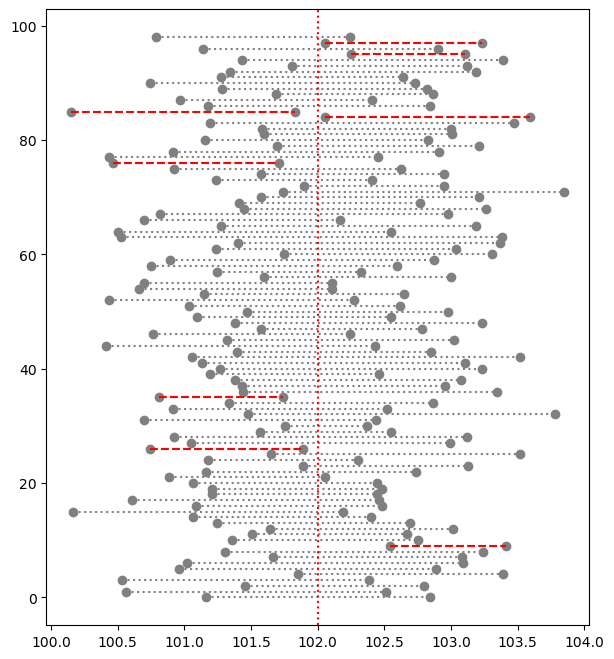

In [39]:
#sns.scatterplot(data=ci_all)
from matplotlib.pyplot import figure
figure(figsize=(7,8))
xvalues=[ci_all[0],ci_all[1]]
yvalues=[range(0,99,1),range(0,99,1)]
plt.plot(xvalues, yvalues,":",color="grey",marker="o");
plt.axvline(x=102,color="red",linestyle=":")
xAvalues=[ci_all_Q[0],ci_all_Q[1]]
yAvalues=[ci_all_Q.index,ci_all_Q.index]
plt.plot(xAvalues,yAvalues,"--",color="red");

How many did we find out of the 100 confidence intervals that did not contain the true known mean of 102?

Let's look at it all together:

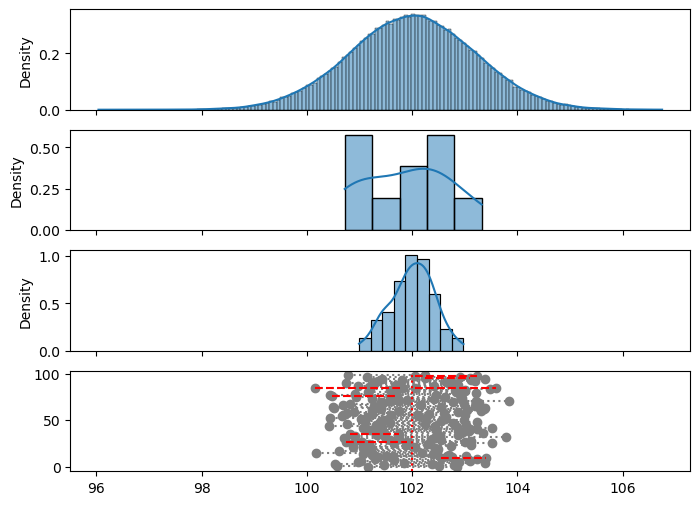

In [40]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots(4,sharex=True,figsize=(8,6))
ax[1]=sns.histplot(normal_random_variables_BP_10,kde=True,stat='density',ax=ax[1])
ax[0]=sns.histplot(normal_random_variables_BP,kde=True,stat='density',ax=ax[0])
ax[2]=sns.histplot(mean_BP10B,kde=True, stat='density',ax=ax[2])
xvalues=[ci_all[0],ci_all[1]]
yvalues=[range(0,99,1),range(0,99,1)]
ax[3]=plt.plot(xvalues, yvalues,":",color="grey",marker="o");
ax[3]=plt.axvline(x=102,color="red",linestyle=":")
xAvalues=[ci_all_Q[0],ci_all_Q[1]]
yAvalues=[ci_all_Q.index,ci_all_Q.index]
ax[3]=plt.plot(xAvalues,yAvalues,"--",color="red");

The top plot is the population showing the true mean and standard deviation.

The 2nd plot is a sample of n=10 with a sample mean and sample standard deviation.  The SEM is the s/$\sqrt{10}$ and shows how close the sample mean comes to estimating the true mean.

The 3rd plot is the sampling distribution of the sample means.

The 4th plot shows the 95% CI calculated from 100 samples, with those that do not contain the true mean shown in red.

We are 95% confident that our interval (the particular interval from our particular sample) contains the population mean boling point.

If we created 100 confidence intervals of the same size from the same population, we would expect 95 of them to contain the true parameter (the population mean). We also expect five of the intervals would not contain the parameter.